## Titanic Dataset

use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
# importing baisc libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading train and test dataset

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# display top 2 rows of datasets

train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [5]:
# exploring the train dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# checking null values

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
for col in train_df.columns:
    n = (train_df[col].isna().sum() / len(train_df[col]))
    print(f"{col} null : {n.round(3)}")

PassengerId null : 0.0
Survived null : 0.0
Pclass null : 0.0
Name null : 0.0
Sex null : 0.0
Age null : 0.199
SibSp null : 0.0
Parch null : 0.0
Ticket null : 0.0
Fare null : 0.0
Cabin null : 0.771
Embarked null : 0.002


In [9]:
# Checking unique values

for col in train_df.columns:
    n = len(train_df[col].unique())
    print(f"{col} Unique Values: {n}")

PassengerId Unique Values: 891
Survived Unique Values: 2
Pclass Unique Values: 3
Name Unique Values: 891
Sex Unique Values: 2
Age Unique Values: 89
SibSp Unique Values: 7
Parch Unique Values: 7
Ticket Unique Values: 681
Fare Unique Values: 248
Cabin Unique Values: 148
Embarked Unique Values: 4


In [10]:
for col in test_df.columns:
    n=test_df[col].isnull().sum()
    print(f"{col} Null values: {n}")

PassengerId Null values: 0
Pclass Null values: 0
Name Null values: 0
Sex Null values: 0
Age Null values: 86
SibSp Null values: 0
Parch Null values: 0
Ticket Null values: 0
Fare Null values: 1
Cabin Null values: 327
Embarked Null values: 0


In [11]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
# replaceing the nan values with most frequent value for Embarked and mean for Age

train_df['Embarked'].fillna(value=train_df['Embarked'].mode()[0], inplace=True)
train_df['Embarked'].isnull().sum()

0

In [14]:
train_df['Age'].fillna(value=train_df['Age'].mean(), inplace=True)
print(train_df['Age'].isnull().sum())

test_df['Age'].fillna(value=test_df['Age'].mean(), inplace=True)
print(test_df['Age'].isnull().sum())

test_df['Fare'].fillna(value=test_df['Fare'].mode()[0], inplace=True)
print(test_df['Fare'].isnull().sum())

0
0
0


In [15]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [16]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
# dropping cabin columns from train and test dataset

train_df.drop(columns ='Cabin', axis=1, inplace=True)
test_df.drop(columns='Cabin', axis=1, inplace=True)

In [18]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
# feature engineering

# checking the percentage of men and women survived

men = train_df.loc[train_df.Sex == 'male']['Survived']
men_survived = sum(men)/len(men)
men_survived

0.18890814558058924

In [21]:
women = train_df.loc[train_df.Sex == 'female']['Survived']
women_survived = sum(women) / len(women)
women_survived

0.7420382165605095

In [22]:
# build a model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [23]:
le = LabelEncoder()
scaler = StandardScaler()

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
train_df.drop(columns = ['Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(columns = ['Name','Ticket'], axis=1, inplace=True)

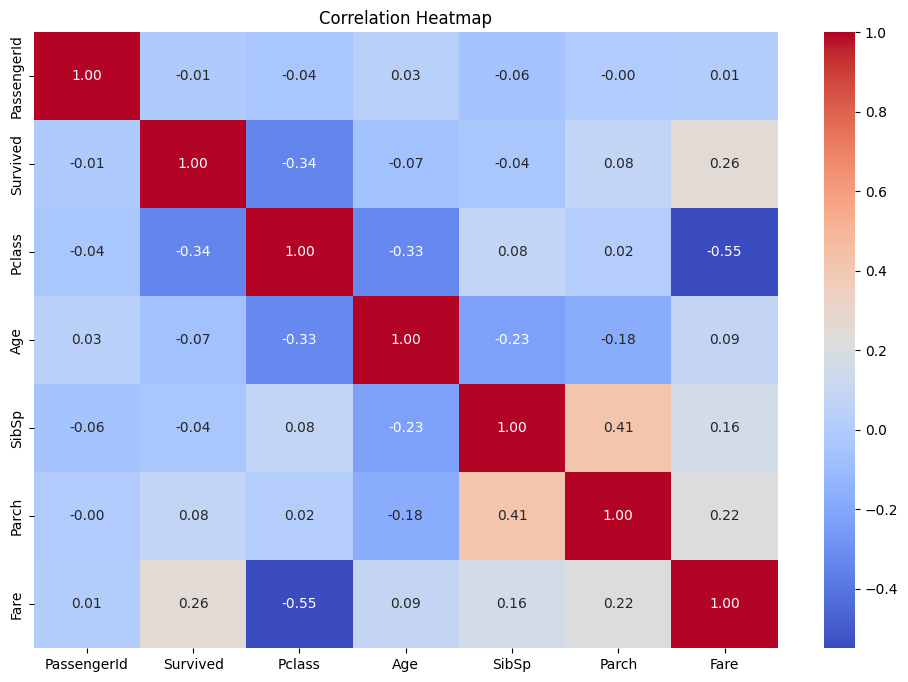

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with target variable 'target'
correlation = train_df.corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Look at the correlation with the target
print(correlation['Survived'].sort_values(ascending=False))


In [27]:
# y=train_df['Survived']
# X=train_df.drop(columns='Survived', axis=1)

In [30]:
train_df = pd.get_dummies(train_df, dtype='int')
test_df = pd.get_dummies(test_df, dtype ='int')

In [31]:
n = train_df.corr()
print(n['Survived'].sort_values(ascending=False))

Survived       1.000000
Sex_female     0.543351
Fare           0.257307
Embarked_C     0.168240
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Embarked_S    -0.149683
Pclass        -0.338481
Sex_male      -0.543351
Name: Survived, dtype: float64


In [33]:
feature = ["Sex_female","Sex_male","Fare","Parch","SibSp"]
y=train_df['Survived']

In [34]:
X_scale = scaler.fit_transform(train_df[feature])
test_df_scale = scaler.transform(test_df[feature])

In [35]:
rf = RandomForestClassifier(n_estimators=200,max_depth=8,random_state=42)

rf.fit(X_scale, y)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [36]:
y_test_pred = rf.predict(test_df_scale)

In [37]:
prediction = pd.DataFrame({'PassengerId':test_df.PassengerId, 'Survived':y_test_pred})

In [38]:
prediction.to_csv('submission.csv', index=False)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [40]:
def classification_model (x,y,test):
    models={
        'logistic regression':LogisticRegression(),
        'decision tree':DecisionTreeClassifier(),
        'Adaboost': AdaBoostClassifier(),
        'Gradient boost': GradientBoostingClassifier(),
        'KNN': KNeighborsClassifier()
    }

    for name, model in models.items():
        model.fit(x,y)
        pred = model.predict(test)
        prediction = pd.DataFrame({'PassengerId':test_df.PassengerId,'Survived':pred})
        prediction.to_csv(f'{model}submission.csv', index=False)


In [41]:
classification_model(X_scale,y,test_df_scale)

C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
# # correlation matrix

# plt.figure(figsize = (12,8))
# c=X.corr()
# sns.heatmap(c, annot=True,fmt='1f',cmap='rainbow')
# plt.title('heatmap')

In [ ]:
# from sklearn.decomposition import PCA

# pca= PCA(n_components=0.90)

In [ ]:
# X_scaled_pca = pca.fit_transform(X_scale)

In [ ]:
# test_pca = pca.transform(test_df_scale)

In [ ]:
# rf.fit(X_scaled_pca, y)

In [ ]:
# pred1 = rf.predict(test_pca)

In [ ]:
# output1 = pd.DataFrame({'PassengerId':test_df.PassengerId,'Survived':pred1})
# output1.to_csv('PCA_submission.csv', index=False)